In [1]:
import pandas as pd

In [2]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/AI Assignment/Decision Tree Regression/insurance_pre.csv")

In [4]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [8]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [9]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [10]:
dependent=dataset[["charges"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)


In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor   #supports for both regression and classification
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor=regressor.fit(X_train,y_train)

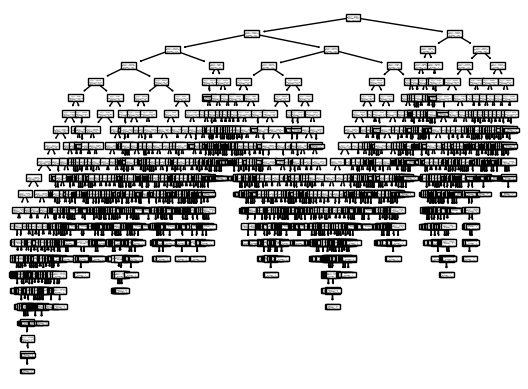

In [79]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [80]:
y_pred=regressor.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [82]:
r_score

0.7296869243385586

In [83]:
import pickle
filename="/content/drive/MyDrive/AI Assignment/Decision Tree Regression/insurance_pre.csv"
pickle.dump(regressor,open(filename,'wb'))

In [84]:
loaded_model=pickle.load(open("/content/drive/MyDrive/AI Assignment/Decision Tree Regression/insurance_pre.csv",'rb'))
result=loaded_model.predict([[20,45,2,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [85]:
result

array([42112.2356])